In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df=pd.read_csv('/content/bbc_news_clust.csv')

#DATA EXPLORATION

In [3]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [4]:
df.tail()

,title,pubDate,guid,link,description
42110,Highlights: Wales make history in Dublin,"Tue, 03 Dec 2024 23:07:27 GMT",https://www.bbc.com/sport/football/videos/ckg1...,https://www.bbc.com/sport/football/videos/ckg1...,Watch highlights as Wales win 2-1 in Dublin fo...
42111,Gang jailed over £200m of cocaine in banana boxes,"Tue, 03 Dec 2024 17:48:54 GMT",https://www.bbc.com/news/articles/c3e8pvg284no#9,https://www.bbc.com/news/articles/c3e8pvg284no,More than two tonnes of the Class A drug was s...
42112,Scottish Budget presents huge challenges for SNP,"Tue, 03 Dec 2024 23:00:17 GMT",https://www.bbc.com/news/articles/ckg1m1j2grpo#9,https://www.bbc.com/news/articles/ckg1m1j2grpo,Finance Secretary Shona Robison is preparing t...
42113,Celebrations as Wales make history qualifying ...,"Wed, 04 Dec 2024 00:05:52 GMT",https://www.bbc.com/news/articles/c791nq8nl73o#9,https://www.bbc.com/news/articles/c791nq8nl73o,Wales defeated the Republic of Ireland 2-1 mak...
42114,School tells Muslim girls it’s ‘not safe’ for ...,"Wed, 04 Dec 2024 00:03:58 GMT",https://www.bbc.com/news/articles/cx2wk0k4597o#9,https://www.bbc.com/news/articles/cx2wk0k4597o,Three children have not been back to the Belfa...


In [5]:
df.shape

(42115, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42115 entries, 0 to 42114
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        42115 non-null  object
 1   pubDate      42115 non-null  object
 2   guid         42115 non-null  object
 3   link         42115 non-null  object
 4   description  42115 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [7]:
df['description'].unique()

array(['The Ukrainian president says the country will not forgive or forget those who murder its civilians.',
       'Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.',
       "One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.",
       ...,
       'Finance Secretary Shona Robison is preparing to set out her spending plans for next year.',
       'Wales defeated the Republic of Ireland 2-1 making footballing history in their first major tournament.',
       'Three children have not been back to the Belfast Model School for Girls since an alleged assault there in November. '],
      dtype=object)

In [8]:
df.shape

(42115, 5)

In [9]:
df['description'].value_counts()

,count
description,
How closely have you been paying attention to what's been going on over the past seven days?,80
How do people say they will vote in the UK general election? Our poll tracker measures the trends.,43
A selection of striking images from our readers around the world.,41
"A selection of striking images from around the world, taken over the past seven days.",34
"A selection of powerful images from all over the globe, taken in the past seven days.",28
...,...
More than 80 people also suffer bullet wounds after troops surround a house with militants inside.,1
Official figures reveal nearly four in 10 adults in England and Wales have never been married.,1
"Alannah, a 27-year-old blogger from Scotland, shares her weekly spending diary.",1


In [10]:
df['title'].value_counts()

,count
title,
Election poll tracker: How do the parties compare?,34
Ukraine war in maps: Tracking the Russian invasion,32
Newscast,30
What is the UK inflation rate and why is the cost of living rising?,26
How many Ukrainians have fled their homes and where have they gone?,18
...,...
Manchester United 2-1 Barcelona (4-3 on agg): Fred and Antony send Man Utd into Europa League last 16,1
Cost of living: Buying a tiny house helps couple tackle crisis,1
John Motson obituary: BBC commentator was 'voice of football' for 50 years,1


#DATA WRANGLING

In [11]:
df['Clean_Description']=df['description'].str.lower()
df['Clean_Description']=df['description'].str.strip()

In [12]:
df=df[df['Clean_Description'].str.len()>10].reset_index(drop=True)

In [13]:
df['Clean_Description'].head()

,Clean_Description
0,The Ukrainian president says the country will ...
1,"Jeremy Bowen was on the frontline in Irpin, as..."
2,One of the world's biggest fertiliser firms sa...
3,The parents of the Manchester Arena bombing's ...
4,Consumers are feeling the impact of higher ene...


In [16]:
from sklearn.feature_extraction import text
base_stop = text.ENGLISH_STOP_WORDS
extra_stop = {
    "says", "say", "said", "new",
    "bbc", "uk", "britain", "london",
    "people", "man", "men", "woman", "women", "children",
    "year", "years", "day", "days",
    "today", "yesterday", "tomorrow",
    "time", "set", "make", "made"
}
custom_stop = base_stop.union(extra_stop)
custom_stop=list(custom_stop)
len(base_stop), len(custom_stop)


(318, 342)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words=custom_stop
                   ,min_df=2,max_df=0.95)
X_counts=cv.fit_transform(df['Clean_Description'])
vocab=cv.get_feature_names_out()
X_counts.shape

(42115, 18597)

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(
    n_components=5,
    learning_method='online',
    random_state=42,
    max_iter=10
)
lda.fit(X_counts)

LatentDirichletAllocation(learning_method='online', n_components=5,
                          random_state=42)

In [19]:
N_TOP_WORDS = 5
vocab = cv.get_feature_names_out()
for k, comp in enumerate(lda.components_):
    top_idx = np.argsort(comp)[::-1][:N_TOP_WORDS]
    words = [vocab[i] for i in top_idx]
    print(f"\nTopic {k}: " + ", ".join(words))


Topic 0: old, family, died, help, killed

Topic 1: ukraine, government, russia, israel, attack

Topic 2: election, minister, team, party, labour

Topic 3: england, world, cup, police, final

Topic 4: league, manchester, city, united, premier


In [24]:
topic_names = {
    0: "Health/Society",        # old, family, died, help, killed
    1: "International Conflict",# ukraine, russia, israel, government, attack
    2: "Domestic Politics",     # election, minister, party, labour
    3: "Global Sports Events",  # england, world, cup, final, police
    4: "Football / Premier League"  # league, manchester, city, united, premier
}
topic_names


{0: 'Health/Society',
 1: 'International Conflict',
 2: 'Domestic Politics',
 3: 'Global Sports Events',
 4: 'Football / Premier League'}

In [25]:
dominant = doc_topic.argmax(axis=1)

counts = pd.Series(dominant).value_counts().sort_index()

summary = pd.DataFrame({
    "topic_id": counts.index,
    "topic_name": [topic_names.get(t, f"Topic {t}") for t in counts.index],
    "num_docs": counts.values
})
summary


,topic_id,topic_name,num_docs
0,0,Health/Society,8325
1,1,International Conflict,9682
2,2,Domestic Politics,9833
3,3,Global Sports Events,8185
4,4,Football / Premier League,6090


In [28]:
import pandas as pd
import numpy as np

TOPN = 5  # how many examples per topic to display

has_title = "title" in df.columns
view_cols = ["title", "Clean_Description"] if has_title else ["Clean_Description"]
mini_df = df[view_cols].copy()

rows = []
for t in range(doc_topic.shape[1]):
    # indices of the top-N docs for topic t
    top_idx = np.argsort(doc_topic[:, t])[::-1][:TOPN]
    for rank, i in enumerate(top_idx, 1):
        rows.append({
            "topic_id": t,
            "topic_name": topic_names.get(t, f"Topic {t}"),
            "rank": rank,
            "score": float(doc_topic[i, t]),
            "title": mini_df.iloc[i]["title"] if has_title else "(no title)",
            "snippet": mini_df.iloc[i]["Clean_Description"][:140] + "…"
        })

top_examples = pd.DataFrame(rows)
top_examples


,topic_id,topic_name,rank,score,title,snippet
0,0,Health/Society,1,0.933258,'They thought he was too young for heart disease',A mother whose son died from heart disease urg...
1,0,Health/Society,2,0.927217,"Ukraine: Our parents wouldn’t leave Bucha, the...",Sisters Lesia and Galya lost touch with their ...
2,0,Health/Society,3,0.926183,Riot police in hazmat suits clash with protesters,Protests in Guangzhou continue a week of unres...
3,0,Health/Society,4,0.920000,March 4 Justice: Has anything changed for Aust...,"One year ago, rape and misconduct allegations ..."
4,0,Health/Society,5,0.919999,Cuddly toy reviews used for headphones on Amazon,Sellers are boosting ratings of electronics wi...
5,1,International Conflict,1,0.938461,Ukraine war in maps: Tracking the Russian inva...,Russian advances grind to a halt in many areas...
6,1,International Conflict,2,0.938461,Ukraine war in maps: Tracking the Russian inva...,Russian advances grind to a halt in many areas...
7,1,International Conflict,3,0.938461,Ukraine war in maps: Tracking the Russian inva...,Russian advances grind to a halt in many areas...
8,1,International Conflict,4,0.933333,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...
9,1,International Conflict,5,0.933333,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...


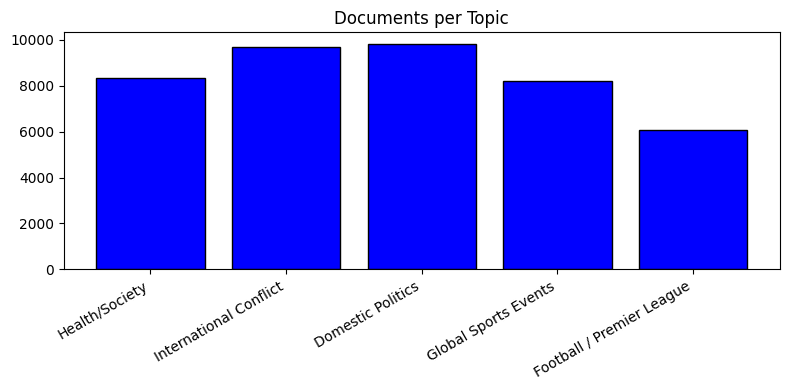

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(summary["topic_name"], summary["num_docs"], color='blue', edgecolor="black", linewidth=1)
plt.xticks(rotation=30, ha="right")
plt.title("Documents per Topic")
plt.tight_layout()
plt.show()


In [35]:
summary.to_csv("topic_summary.csv", index=False)
top_examples.to_csv("topic_top_examples.csv", index=False)
print("Saved: topic_summary.csv, topic_top_examples.csv")


Saved: topic_summary.csv, topic_top_examples.csv


In [39]:
!pip -q install wordcloud

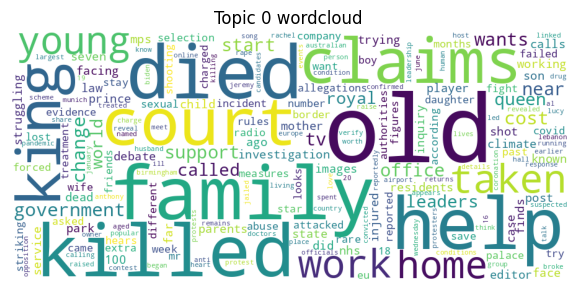

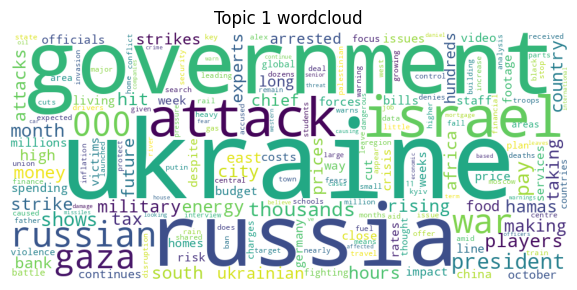

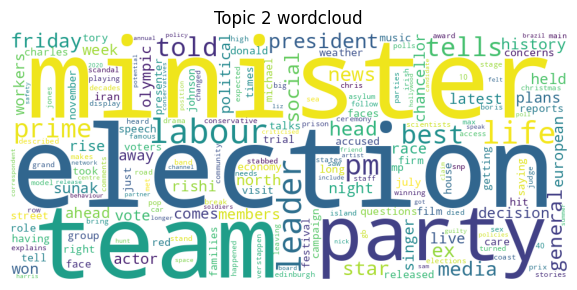

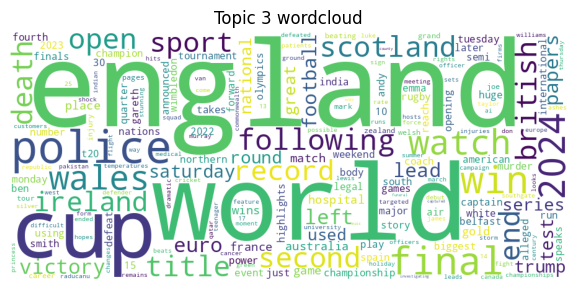

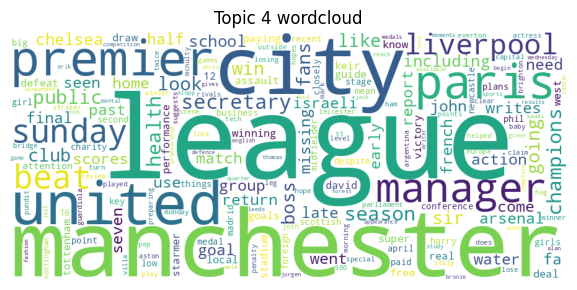

In [40]:
from wordcloud import WordCloud

K = lda.components_.shape[0]
vocab = cv.get_feature_names_out()

for t in range(K):
    comp = lda.components_[t]
    freqs = {vocab[i]: float(comp[i]) for i in range(len(vocab))}
    wc = WordCloud(width=900, height=400, background_color="white").generate_from_frequencies(freqs)
    plt.figure(figsize=(8, 3))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Topic {t} wordcloud")
    plt.tight_layout()
    plt.show()
